## Identify core of AW layer in each row

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import gsw

In [2]:
theta_dir = 'H:/PhD_chap3/data/ECCO_melville/rows_netcdfs/THETA/'
salt_dir  = 'H:/PhD_chap3/data/ECCO_melville/rows_netcdfs/SALT/'

Open theta datasets

In [3]:
theta_row000 = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2018_row000.nc')
theta_row025 = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2018_row025.nc')
theta_row050 = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2018_row050.nc')
theta_row075 = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2018_row075.nc')
theta_row100 = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2018_row100.nc')
theta_row125 = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2018_row125.nc')
theta_row150 = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2018_row150.nc')

theta_row000.close()
theta_row025.close()
theta_row050.close()
theta_row075.close()
theta_row100.close()
theta_row125.close()
theta_row150.close()

Open salinity datasets

In [4]:
salt_row000 = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2018_row000.nc')
salt_row025 = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2018_row025.nc')
salt_row050 = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2018_row050.nc')
salt_row075 = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2018_row075.nc')
salt_row100 = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2018_row100.nc')
salt_row125 = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2018_row125.nc')
salt_row150 = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2018_row150.nc')

salt_row000.close()
salt_row025.close()
salt_row050.close()
salt_row075.close()
salt_row100.close()
salt_row125.close()
salt_row150.close()

Calculate density using theta and salt

In [5]:
# calculate potential density - reference 1000 kgm^(-3)
density_row000 = gsw.density.sigma0(salt_row000.SALT, theta_row000.THETA)
density_row025 = gsw.density.sigma0(salt_row025.SALT, theta_row025.THETA)
density_row050 = gsw.density.sigma0(salt_row050.SALT, theta_row050.THETA)
density_row075 = gsw.density.sigma0(salt_row075.SALT, theta_row075.THETA)
density_row100 = gsw.density.sigma0(salt_row100.SALT, theta_row100.THETA)
density_row125 = gsw.density.sigma0(salt_row125.SALT, theta_row125.THETA)
density_row150 = gsw.density.sigma0(salt_row150.SALT, theta_row150.THETA)

Calculate seasonal climatologies

In [6]:
## define a function to map timestamps to seasons
def map_to_season(month):
    if 1 <= month <= 3:
        return 'JFM'
    elif 4 <= month <= 6:
        return 'AMJ'
    elif 7 <= month <= 9:
        return 'JAS'
    elif 10 <= month <= 12:
        return 'OND'

## create function to take seasonal means
def seasonal_mean(ds):
    ## apply the above function to create a new coordinate 'season'
    seasons_array = xr.apply_ufunc(map_to_season, ds['time.month'], dask = 'allowed', vectorize = True)
    ds.coords['season'] = ('time', seasons_array.values)

    # group by 'season' and calculate the mean of 'value' for each season
    seasonal_means = ds.groupby('season').mean()
    return seasonal_means

In [7]:
## apply function to datasets

## theta
theta_row000_season = seasonal_mean(theta_row000)
theta_row025_season = seasonal_mean(theta_row025)
theta_row050_season = seasonal_mean(theta_row050)
theta_row075_season = seasonal_mean(theta_row075)
theta_row100_season = seasonal_mean(theta_row100)
theta_row125_season = seasonal_mean(theta_row125)
theta_row150_season = seasonal_mean(theta_row150)

## salinity
salt_row000_season = seasonal_mean(salt_row000)
salt_row025_season = seasonal_mean(salt_row025)
salt_row050_season = seasonal_mean(salt_row050)
salt_row075_season = seasonal_mean(salt_row075)
salt_row100_season = seasonal_mean(salt_row100)
salt_row125_season = seasonal_mean(salt_row125)
salt_row150_season = seasonal_mean(salt_row150)

## density
density_row000_season = seasonal_mean(density_row000)
density_row025_season = seasonal_mean(density_row025)
density_row050_season = seasonal_mean(density_row050)
density_row075_season = seasonal_mean(density_row075)
density_row100_season = seasonal_mean(density_row100)
density_row125_season = seasonal_mean(density_row125)
density_row150_season = seasonal_mean(density_row150)

In [8]:
## mask values that are not water (i.e., land mask)
## theta
theta_row000_season = theta_row000_season.where(salt_row000_season.SALT>0)
theta_row025_season = theta_row025_season.where(salt_row025_season.SALT>0)
theta_row050_season = theta_row050_season.where(salt_row050_season.SALT>0)
theta_row075_season = theta_row075_season.where(salt_row075_season.SALT>0)
theta_row100_season = theta_row100_season.where(salt_row100_season.SALT>0)
theta_row125_season = theta_row125_season.where(salt_row125_season.SALT>0)
theta_row150_season = theta_row150_season.where(salt_row150_season.SALT>0)

## salinity
salt_row000_season = salt_row000_season.where(salt_row000_season.SALT>0)
salt_row025_season = salt_row025_season.where(salt_row025_season.SALT>0)
salt_row050_season = salt_row050_season.where(salt_row050_season.SALT>0)
salt_row075_season = salt_row075_season.where(salt_row075_season.SALT>0)
salt_row100_season = salt_row100_season.where(salt_row100_season.SALT>0)
salt_row125_season = salt_row125_season.where(salt_row125_season.SALT>0)
salt_row150_season = salt_row150_season.where(salt_row150_season.SALT>0)

## density
density_row000_season = density_row000_season.where(salt_row000_season.SALT>0)
density_row025_season = density_row025_season.where(salt_row025_season.SALT>0)
density_row050_season = density_row050_season.where(salt_row050_season.SALT>0)
density_row075_season = density_row075_season.where(salt_row075_season.SALT>0)
density_row100_season = density_row100_season.where(salt_row100_season.SALT>0)
density_row125_season = density_row125_season.where(salt_row125_season.SALT>0)
density_row150_season = density_row150_season.where(salt_row150_season.SALT>0)

In [ ]:
theta_row025_season

### Identify core of AW layer

In [9]:
season=['JAS','OND','JFM','AMJ']
density_levels=[25.5,26,27,27.3,27.4]

I demarcate the AW with boxes (x,y bounds) based on theta and salt patterns and potential density limits (27.3-27.4 kgm^-3)

### Row 0

#### Theta

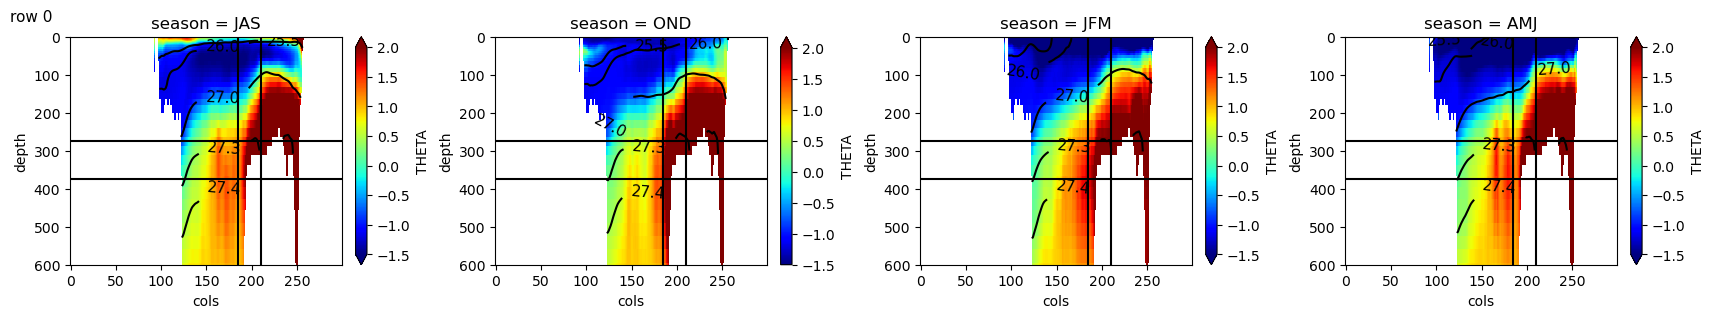

In [10]:
plt.rcParams['figure.figsize'] = [17, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
for i,ax in zip(season,[ax1,ax2,ax3,ax4]):
    theta_row000_season.THETA.sel(season=i).plot(ax=ax,cmap='jet',vmin=-1.5,vmax=2)
    # density_row000_season.sel(season=i).plot.contour(ax=ax,colors='k')
    plt.clabel(density_row000_season.sel(season=i).plot.contour(ax=ax,colors='k',levels=density_levels), inline=True, fontsize=11)
    ax.set_ylim(600,0);
    
    ax.axhline(y=275,color='k')
    ax.axhline(y=375,color='k')
    ax.axvline(x=185,color='k')
    ax.axvline(x=210,color='k');
    
plt.suptitle("row 0",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 11);

Re-plot but zoom in to box and adjust colorbar

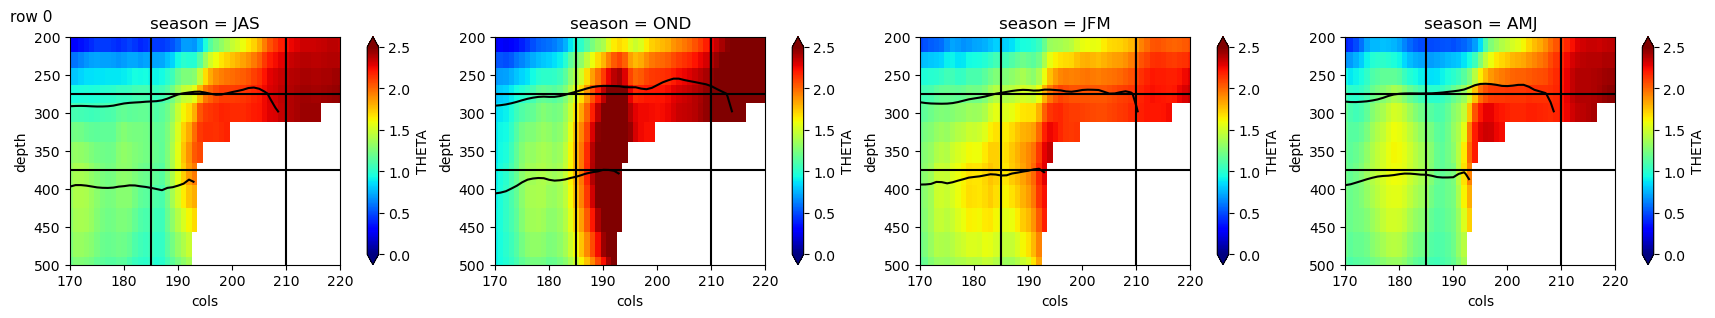

In [11]:
plt.rcParams['figure.figsize'] = [17, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
for i,ax in zip(season,[ax1,ax2,ax3,ax4]):
    theta_row000_season.THETA.sel(season=i).plot(ax=ax,cmap='jet',vmin=0,vmax=2.5)
    # density_row000_season.sel(season=i).plot.contour(ax=ax,colors='k')
    density_row000_season.sel(season=i).plot.contour(ax=ax,colors='k',levels=density_levels)
    ax.set_ylim(600,0);
    
    ax.axhline(y=275,color='k')
    ax.axhline(y=375,color='k')
    ax.axvline(x=185,color='k')
    ax.axvline(x=210,color='k');
    
    ax.set_xlim(170,220)
    ax.set_ylim(500,200)
    
plt.suptitle("row 0",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 11);

Plot anomaly

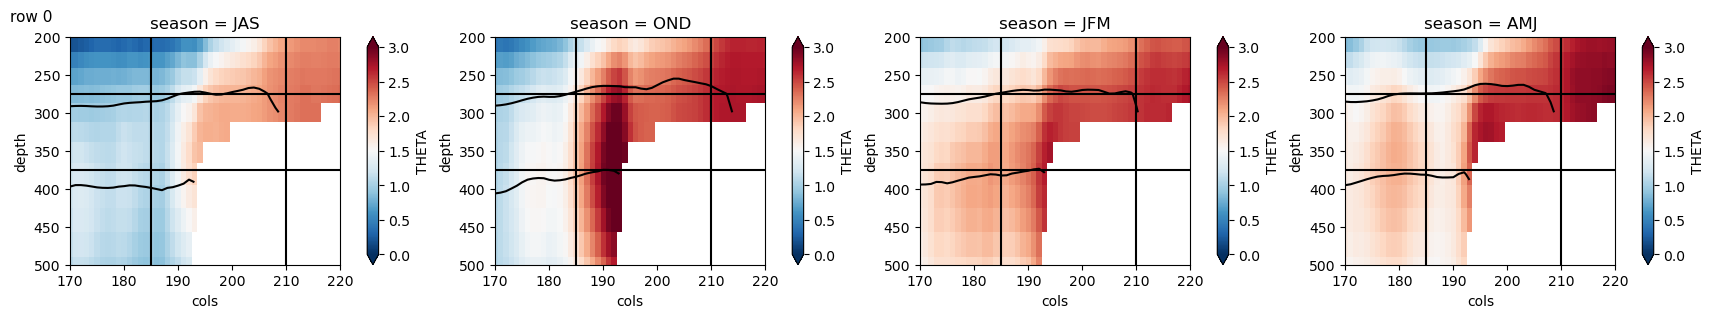

In [12]:
plt.rcParams['figure.figsize'] = [17, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
for i,ax in zip(season,[ax1,ax2,ax3,ax4]):
    (theta_row000_season.THETA.sel(season=i)-theta_row000_season.THETA.sel(season=i).mean()).plot(ax=ax,cmap='RdBu_r',vmin=0,vmax=3)
    # density_row000_season.sel(season=i).plot.contour(ax=ax,colors='k')
    density_row000_season.sel(season=i).plot.contour(ax=ax,colors='k',levels=density_levels)
    ax.set_ylim(600,0);
    
    ax.axhline(y=275,color='k')
    ax.axhline(y=375,color='k')
    ax.axvline(x=185,color='k')
    ax.axvline(x=210,color='k');
    
    ax.set_xlim(170,220)
    ax.set_ylim(500,200)
    
plt.suptitle("row 0",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 11);

#### Salt

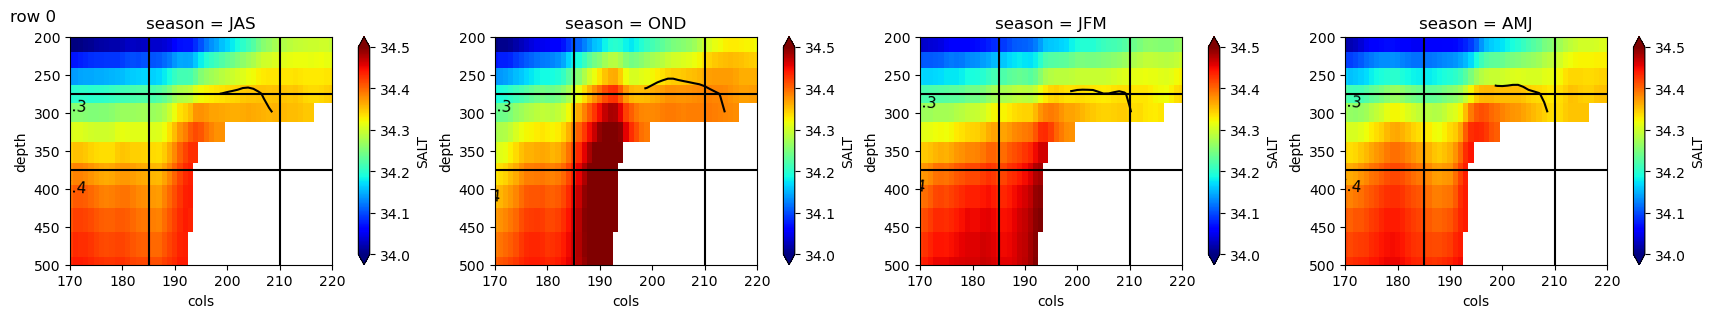

In [13]:
plt.rcParams['figure.figsize'] = [17, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
for i,ax in zip(season,[ax1,ax2,ax3,ax4]):
    salt_row000_season.SALT.sel(season=i).plot(ax=ax,cmap='jet',vmin=34,vmax=34.5)
    # density_row000_season.sel(season=i).plot.contour(ax=ax,colors='k')
    plt.clabel(density_row000_season.sel(season=i).plot.contour(ax=ax,colors='k',levels=density_levels), inline=True, fontsize=11)
    ax.set_ylim(600,0);
    
    ax.axhline(y=275,color='k')
    ax.axhline(y=375,color='k')
    ax.axvline(x=185,color='k')
    ax.axvline(x=210,color='k');
    
    ax.set_xlim(170,220)
    ax.set_ylim(500,200)
    
plt.suptitle("row 0",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);

### Row 25

#### Theta

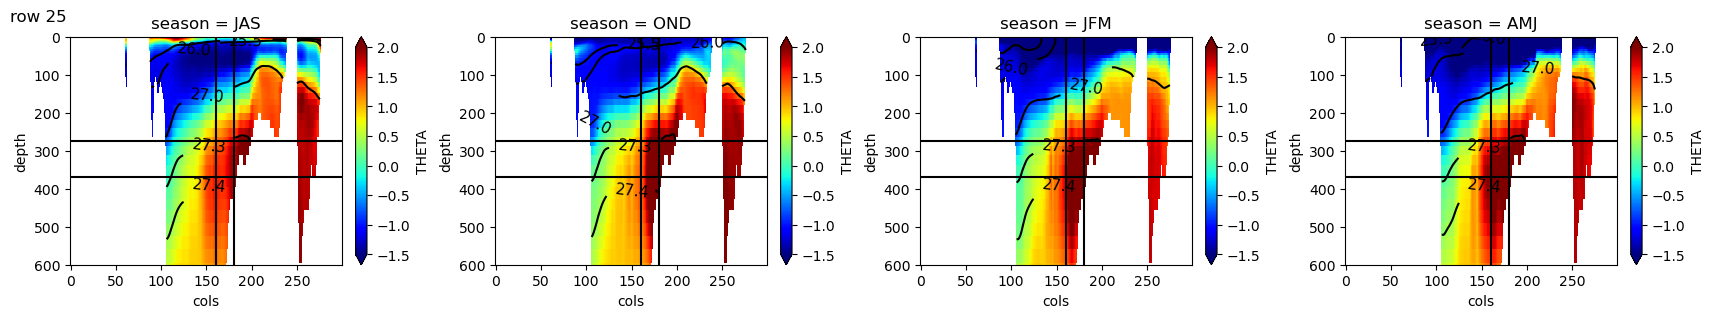

In [14]:
plt.rcParams['figure.figsize'] = [17, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
for i,ax in zip(season,[ax1,ax2,ax3,ax4]):
    theta_row025_season.THETA.sel(season=i).plot(ax=ax,cmap='jet',vmin=-1.5,vmax=2)
    plt.clabel(density_row025_season.sel(season=i).plot.contour(ax=ax,colors='k',levels=density_levels), inline=True, fontsize=11)
    ax.set_ylim(600,0);
    
    ax.axhline(y=275,color='k')
    ax.axhline(y=370,color='k')
    ax.axvline(x=160,color='k')
    ax.axvline(x=180,color='k');
    
plt.suptitle("row 25",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);

Re-plot but zoom in to box and adjust colorbar

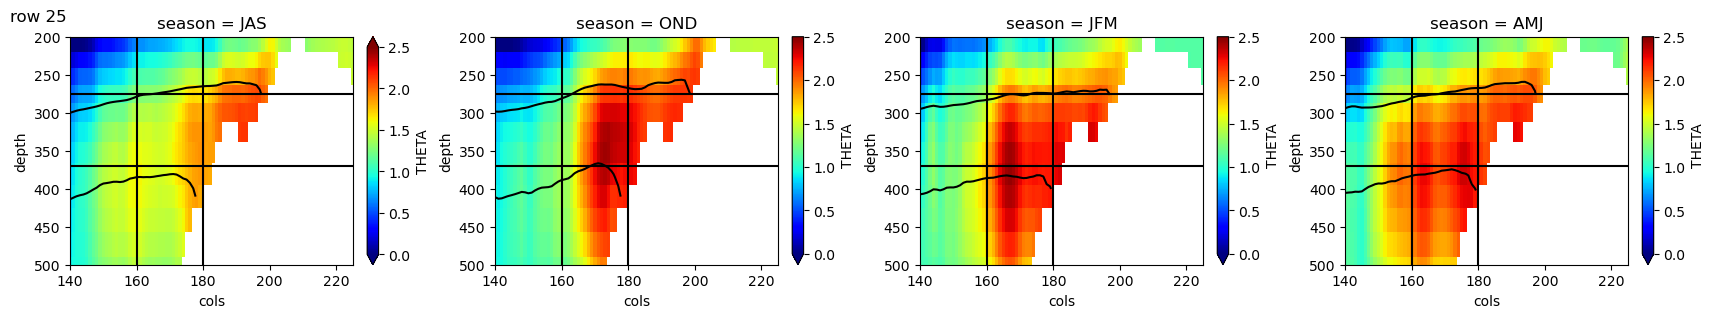

In [15]:
plt.rcParams['figure.figsize'] = [17, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
for i,ax in zip(season,[ax1,ax2,ax3,ax4]):
    theta_row025_season.THETA.sel(season=i).plot(ax=ax,cmap='jet',vmin=0,vmax=2.5)
    density_row025_season.sel(season=i).plot.contour(ax=ax,colors='k',levels=density_levels)
    ax.set_ylim(600,0);
    
    ax.axhline(y=275,color='k')
    ax.axhline(y=370,color='k')
    ax.axvline(x=160,color='k')
    ax.axvline(x=180,color='k');
    
    ax.set_xlim(140,225)
    ax.set_ylim(500,200)
    
plt.suptitle("row 25",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);

Plot anomaly

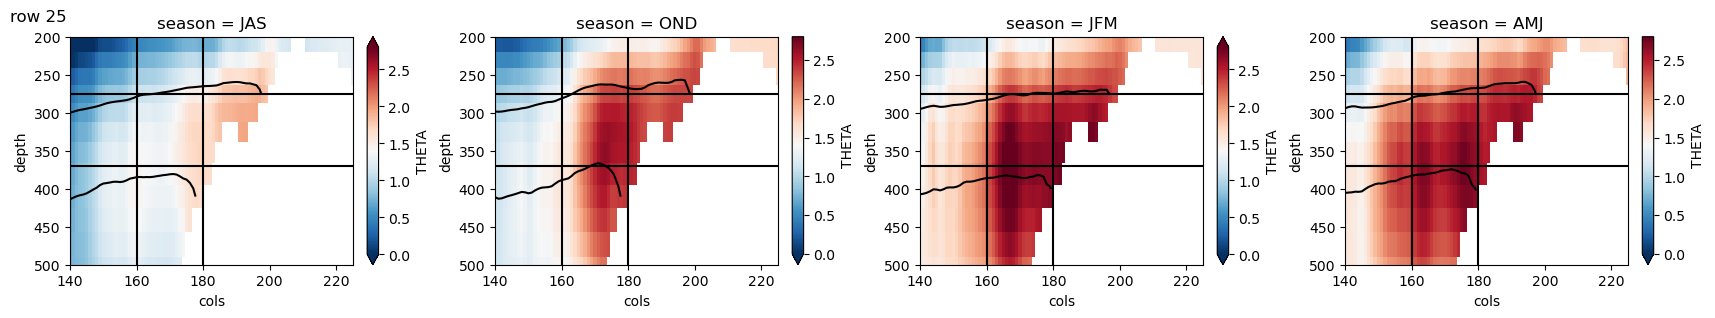

In [16]:
plt.rcParams['figure.figsize'] = [17, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
for i,ax in zip(season,[ax1,ax2,ax3,ax4]):
    (theta_row025_season.THETA.sel(season=i)-theta_row025_season.THETA.sel(season=i).mean()).plot(ax=ax,cmap='RdBu_r',vmin=0,vmax=2.8)
    density_row025_season.sel(season=i).plot.contour(ax=ax,colors='k',levels=density_levels)
    ax.set_ylim(600,0);
    
    ax.axhline(y=275,color='k')
    ax.axhline(y=370,color='k')
    ax.axvline(x=160,color='k')
    ax.axvline(x=180,color='k');
    
    ax.set_xlim(140,225)
    ax.set_ylim(500,200)
    
plt.suptitle("row 25",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);

#### Salt

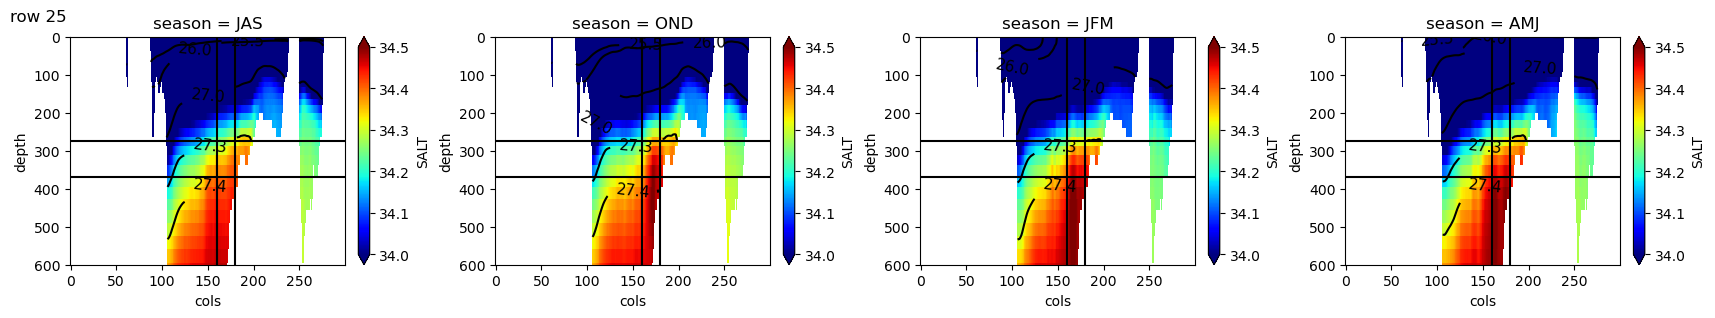

In [17]:
plt.rcParams['figure.figsize'] = [17, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
for i,ax in zip(season,[ax1,ax2,ax3,ax4]):
    salt_row025_season.SALT.sel(season=i).plot(ax=ax,cmap='jet',vmin=34,vmax=34.5)
    plt.clabel(density_row025_season.sel(season=i).plot.contour(ax=ax,colors='k',levels=density_levels), inline=True, fontsize=11)
    ax.set_ylim(600,0);
    
    ax.axhline(y=275,color='k')
    ax.axhline(y=370,color='k')
    ax.axvline(x=160,color='k')
    ax.axvline(x=180,color='k');
    
plt.suptitle("row 25",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);

### Row 50

#### Theta

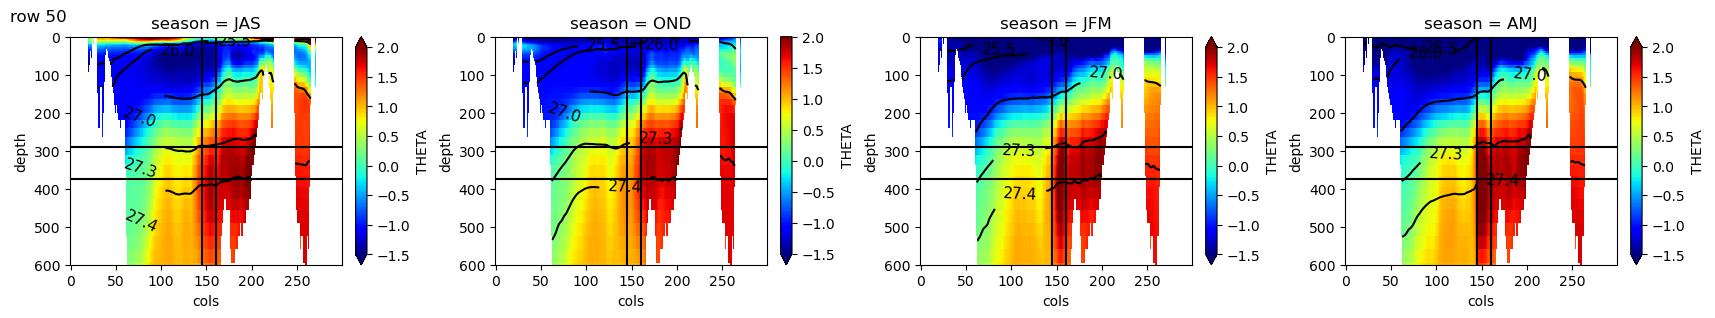

In [18]:
plt.rcParams['figure.figsize'] = [17, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
for i,ax in zip(season,[ax1,ax2,ax3,ax4]):
    theta_row050_season.THETA.sel(season=i).plot(ax=ax,cmap='jet',vmin=-1.5,vmax=2)
    plt.clabel(density_row050_season.sel(season=i).plot.contour(ax=ax,colors='k',levels=density_levels), inline=True, fontsize=11)
    ax.set_ylim(600,0);
    
    ax.axhline(y=290,color='k')
    ax.axhline(y=375,color='k')
    ax.axvline(x=145,color='k')
    ax.axvline(x=160,color='k');
    
plt.suptitle("row 50",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);

Re-plot but zoom in to box and adjust colorbar

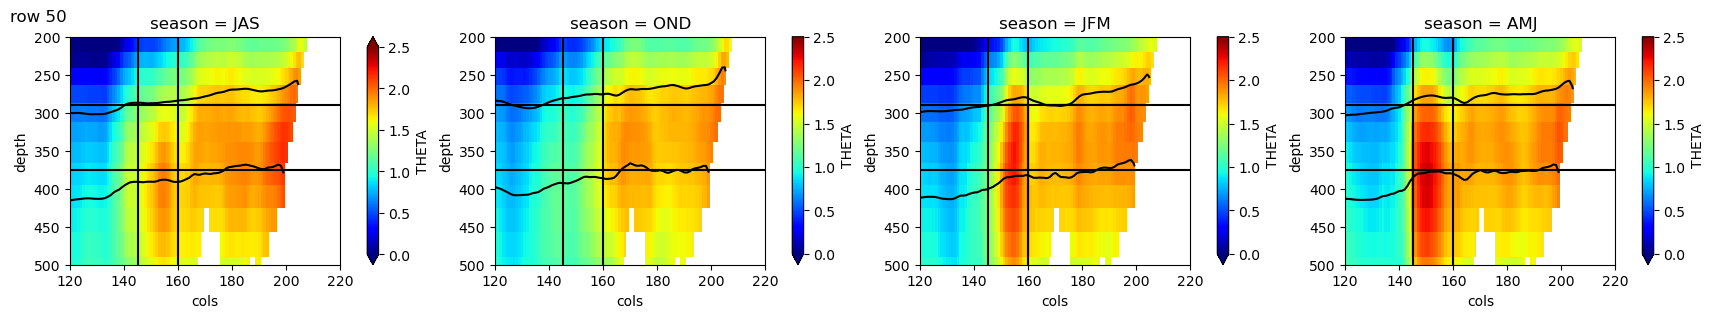

In [19]:
plt.rcParams['figure.figsize'] = [17, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
for i,ax in zip(season,[ax1,ax2,ax3,ax4]):
    theta_row050_season.THETA.sel(season=i).plot(ax=ax,cmap='jet',vmin=0,vmax=2.5)
    density_row050_season.sel(season=i).plot.contour(ax=ax,colors='k',levels=density_levels)
    ax.set_ylim(600,0);
    
    ax.axhline(y=290,color='k')
    ax.axhline(y=375,color='k')
    ax.axvline(x=145,color='k')
    ax.axvline(x=160,color='k');
    
    ax.set_xlim(120,220)
    ax.set_ylim(500,200)
    
plt.suptitle("row 50",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);

Plot anomaly

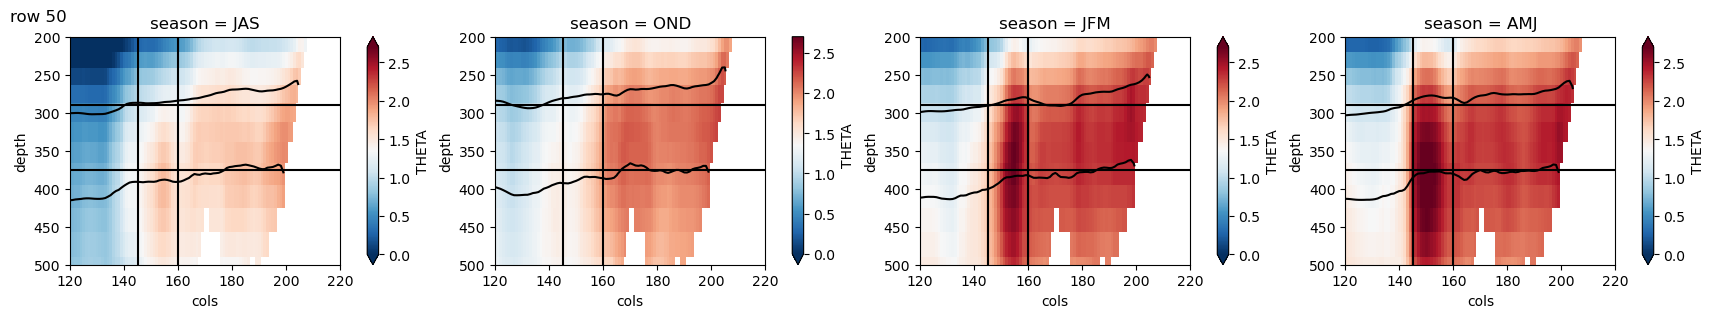

In [20]:
plt.rcParams['figure.figsize'] = [17, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
for i,ax in zip(season,[ax1,ax2,ax3,ax4]):
    (theta_row050_season.THETA.sel(season=i)-theta_row050_season.THETA.sel(season=i).mean()).plot(ax=ax,cmap='RdBu_r',vmin=0,vmax=2.7)
    density_row050_season.sel(season=i).plot.contour(ax=ax,colors='k',levels=density_levels)
    ax.set_ylim(600,0);
    
    ax.axhline(y=290,color='k')
    ax.axhline(y=375,color='k')
    ax.axvline(x=145,color='k')
    ax.axvline(x=160,color='k');
    
    ax.set_xlim(120,220)
    ax.set_ylim(500,200)
    
plt.suptitle("row 50",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);

#### Salt

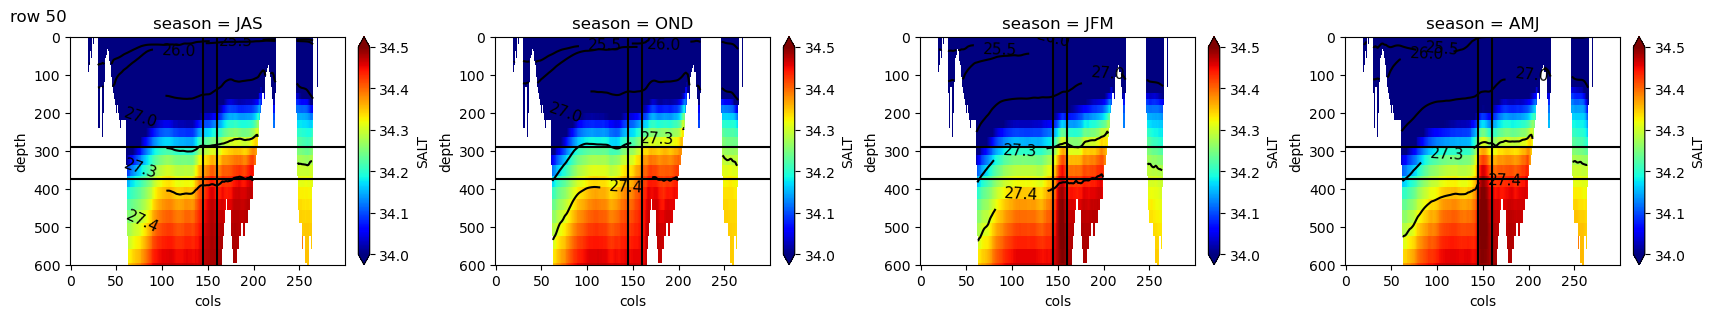

In [21]:
plt.rcParams['figure.figsize'] = [17, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
for i,ax in zip(season,[ax1,ax2,ax3,ax4]):
    salt_row050_season.SALT.sel(season=i).plot(ax=ax,cmap='jet',vmin=34,vmax=34.5)
    plt.clabel(density_row050_season.sel(season=i).plot.contour(ax=ax,colors='k',levels=density_levels), inline=True, fontsize=11)
    ax.set_ylim(600,0);
    
    ax.axhline(y=290,color='k')
    ax.axhline(y=375,color='k')
    ax.axvline(x=145,color='k')
    ax.axvline(x=160,color='k');
    
plt.suptitle("row 50",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);

### Row 75

#### Theta

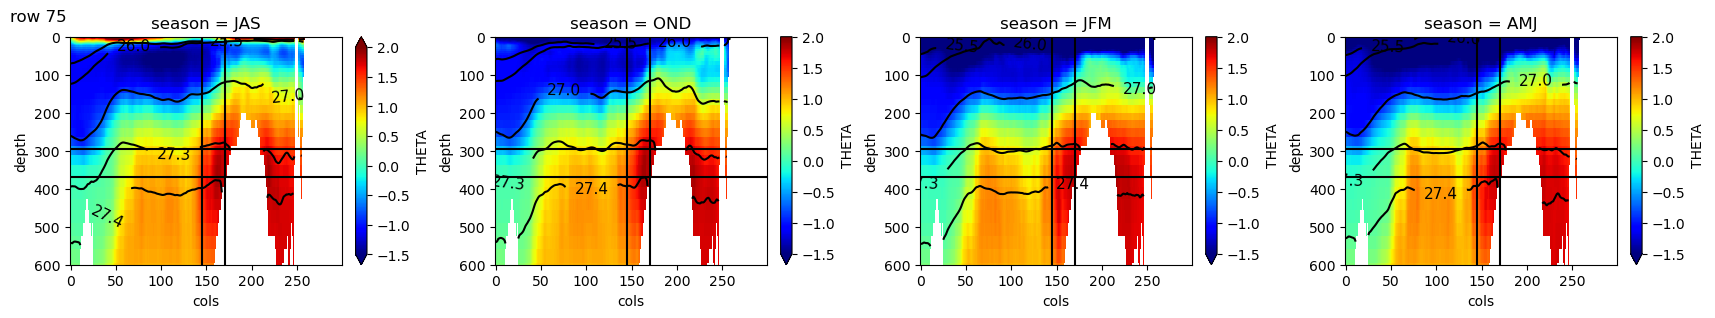

In [22]:
plt.rcParams['figure.figsize'] = [17, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
for i,ax in zip(season,[ax1,ax2,ax3,ax4]):
    theta_row075_season.THETA.sel(season=i).plot(ax=ax,cmap='jet',vmin=-1.5,vmax=2)
    plt.clabel(density_row075_season.sel(season=i).plot.contour(ax=ax,colors='k',levels=density_levels), inline=True, fontsize=11)
    ax.set_ylim(600,0);
    
    ax.axhline(y=295,color='k')
    ax.axhline(y=370,color='k')
    ax.axvline(x=145,color='k')
    ax.axvline(x=170,color='k');
    
plt.suptitle("row 75",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);

Re-plot but zoom in to box and adjust colorbar

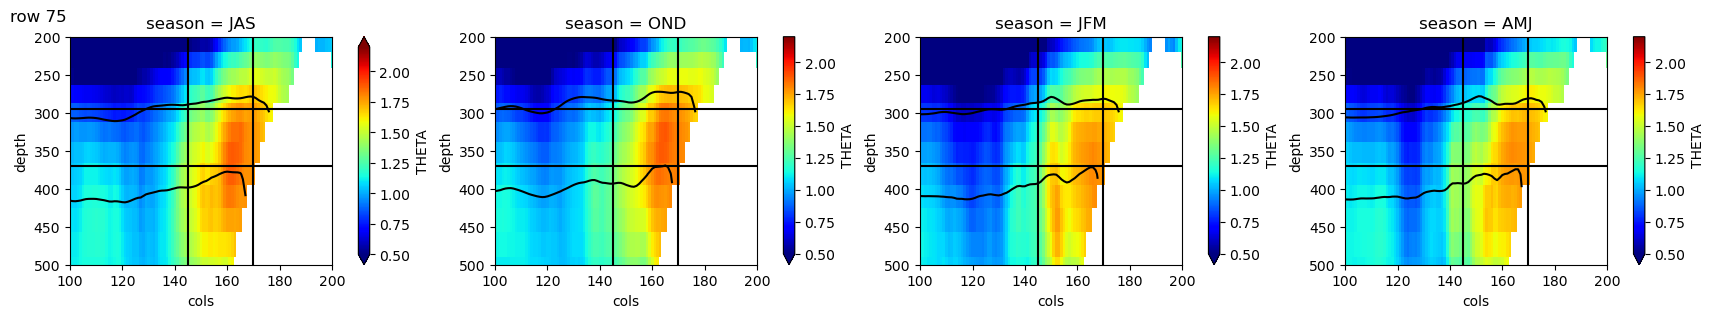

In [23]:
plt.rcParams['figure.figsize'] = [17, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
for i,ax in zip(season,[ax1,ax2,ax3,ax4]):
    theta_row075_season.THETA.sel(season=i).plot(ax=ax,cmap='jet',vmin=0.5,vmax=2.2)
    density_row075_season.sel(season=i).plot.contour(ax=ax,colors='k',levels=density_levels)
    ax.set_ylim(600,0);
    
    ax.axhline(y=295,color='k')
    ax.axhline(y=370,color='k')
    ax.axvline(x=145,color='k')
    ax.axvline(x=170,color='k');
    
    ax.set_xlim(100,200)
    ax.set_ylim(500,200)
    
plt.suptitle("row 75",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);

Plot anomaly

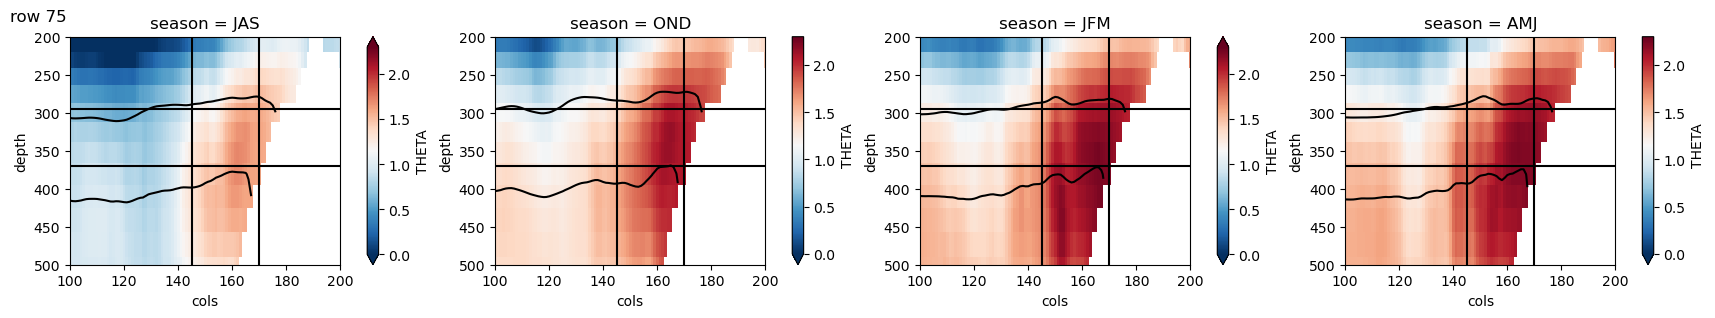

In [24]:
plt.rcParams['figure.figsize'] = [17, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
for i,ax in zip(season,[ax1,ax2,ax3,ax4]):
    (theta_row075_season.THETA.sel(season=i)-theta_row075_season.THETA.sel(season=i).mean()).plot(ax=ax,cmap='RdBu_r',vmin=0,vmax=2.3)
    density_row075_season.sel(season=i).plot.contour(ax=ax,colors='k',levels=density_levels)
    ax.set_ylim(600,0);
    
    ax.axhline(y=295,color='k')
    ax.axhline(y=370,color='k')
    ax.axvline(x=145,color='k')
    ax.axvline(x=170,color='k');
    
    ax.set_xlim(100,200)
    ax.set_ylim(500,200)
    
plt.suptitle("row 75",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);

#### Salt

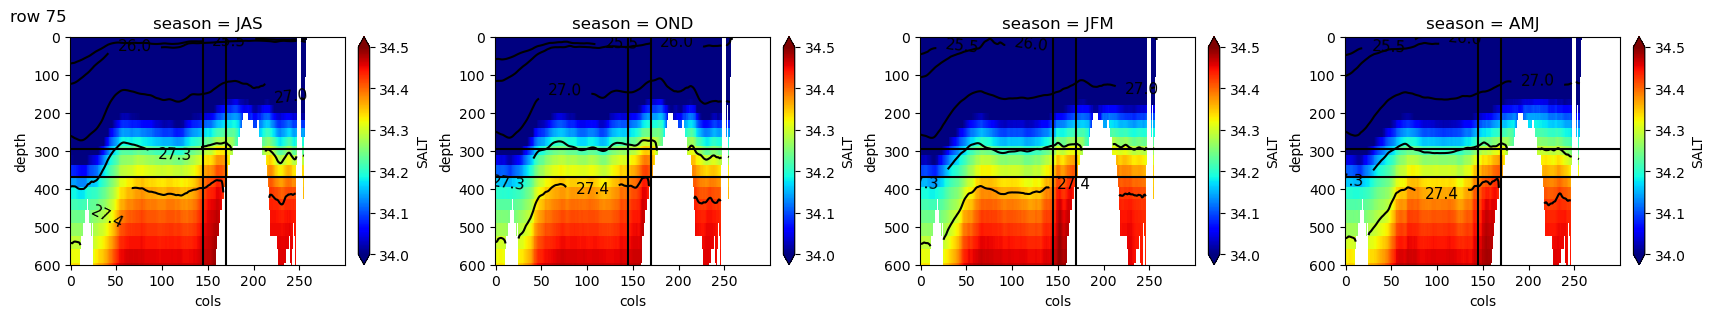

In [25]:
plt.rcParams['figure.figsize'] = [17, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
for i,ax in zip(season,[ax1,ax2,ax3,ax4]):
    salt_row075_season.SALT.sel(season=i).plot(ax=ax,cmap='jet',vmin=34,vmax=34.5)
    plt.clabel(density_row075_season.sel(season=i).plot.contour(ax=ax,colors='k',levels=density_levels), inline=True, fontsize=11)
    ax.set_ylim(600,0);
    
    ax.axhline(y=295,color='k')
    ax.axhline(y=370,color='k')
    ax.axvline(x=145,color='k')
    ax.axvline(x=170,color='k');
    
plt.suptitle("row 75",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);

### Row 100

#### Theta

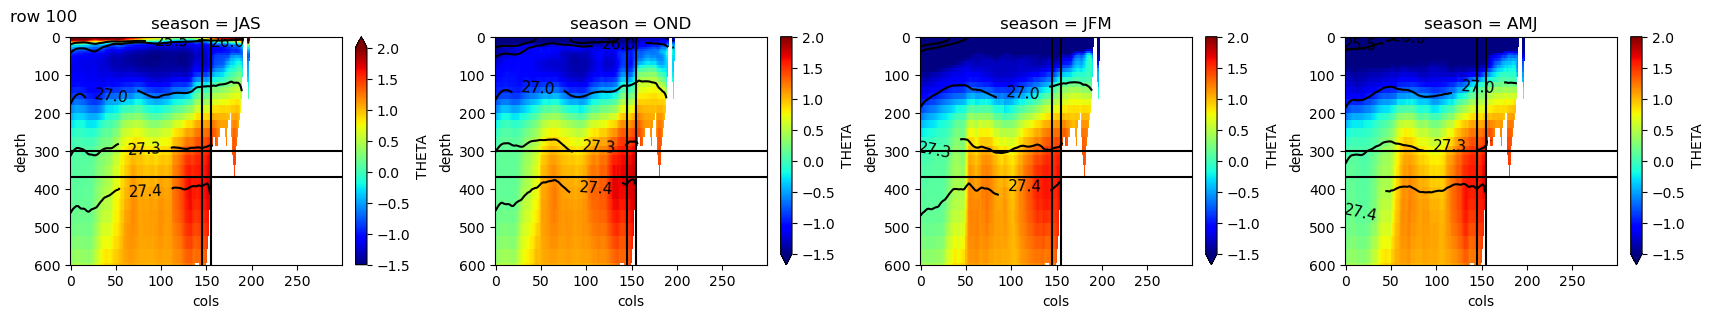

In [26]:
plt.rcParams['figure.figsize'] = [17, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
for i,ax in zip(season,[ax1,ax2,ax3,ax4]):
    theta_row100_season.THETA.sel(season=i).plot(ax=ax,cmap='jet',vmin=-1.5,vmax=2)
    plt.clabel(density_row100_season.sel(season=i).plot.contour(ax=ax,colors='k',levels=density_levels), inline=True, fontsize=11)
    ax.set_ylim(600,0);
    
    ax.axhline(y=300,color='k')
    ax.axhline(y=375,color='k')
    ax.axvline(x=145,color='k')
    ax.axvline(x=155,color='k');
    
plt.suptitle("row 100",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);

Re-plot but zoom in to box and adjust colorbar

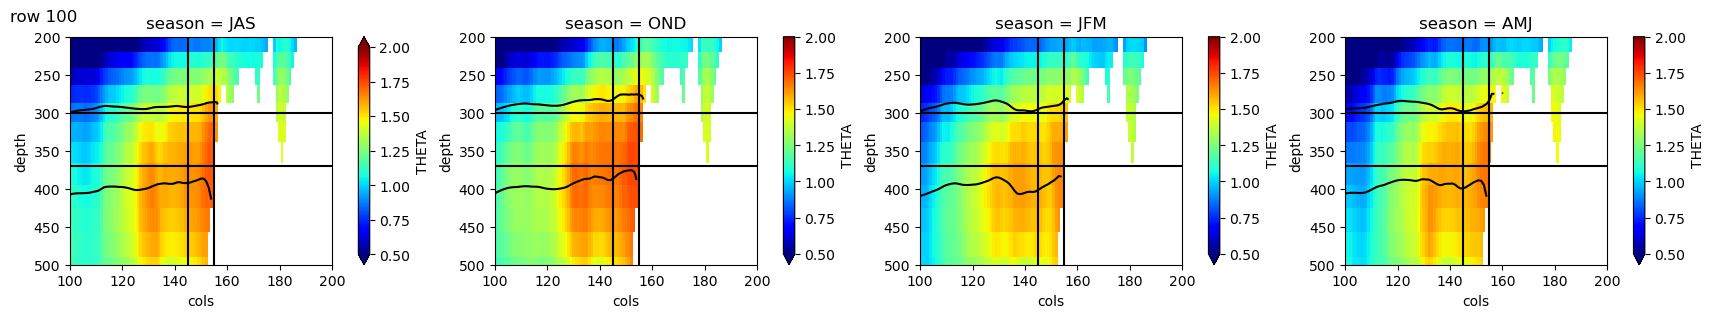

In [27]:
plt.rcParams['figure.figsize'] = [17, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
for i,ax in zip(season,[ax1,ax2,ax3,ax4]):
    theta_row100_season.THETA.sel(season=i).plot(ax=ax,cmap='jet',vmin=0.5,vmax=2)
    density_row100_season.sel(season=i).plot.contour(ax=ax,colors='k',levels=density_levels)
    ax.set_ylim(600,0);
    
    ax.axhline(y=300,color='k')
    ax.axhline(y=375,color='k')
    ax.axvline(x=145,color='k')
    ax.axvline(x=155,color='k');
    
    ax.set_xlim(100,200)
    ax.set_ylim(500,200)
    
plt.suptitle("row 100",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);


Plot anomaly

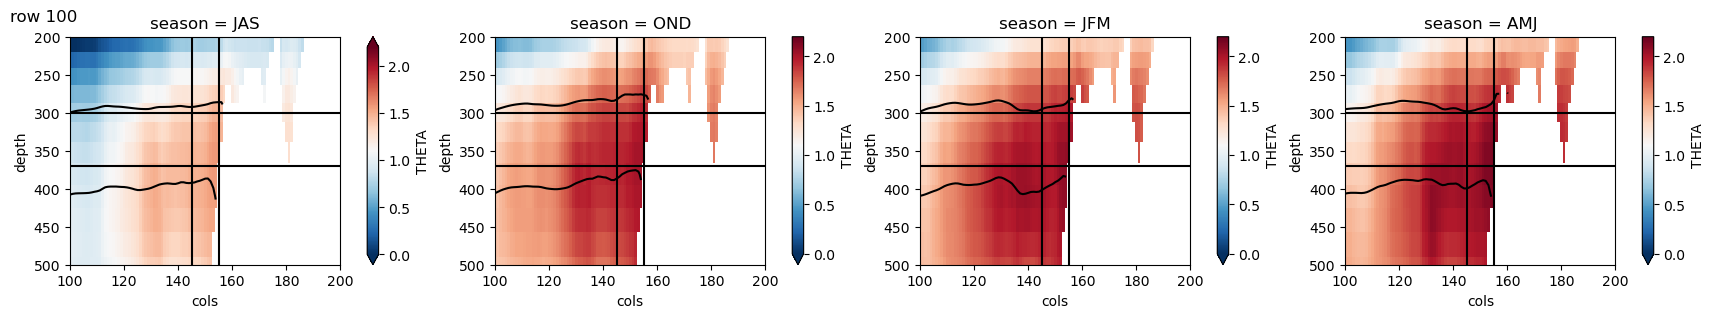

In [28]:
plt.rcParams['figure.figsize'] = [17, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
for i,ax in zip(season,[ax1,ax2,ax3,ax4]):
    (theta_row100_season.THETA.sel(season=i)-theta_row100_season.THETA.sel(season=i).mean()).plot(ax=ax,cmap='RdBu_r',vmin=0,vmax=2.2)
    density_row100_season.sel(season=i).plot.contour(ax=ax,colors='k',levels=density_levels)
    ax.set_ylim(600,0);
    
    ax.axhline(y=300,color='k')
    ax.axhline(y=375,color='k')
    ax.axvline(x=145,color='k')
    ax.axvline(x=155,color='k');
    
    ax.set_xlim(100,200)
    ax.set_ylim(500,200)
    
plt.suptitle("row 100",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);

#### Salt

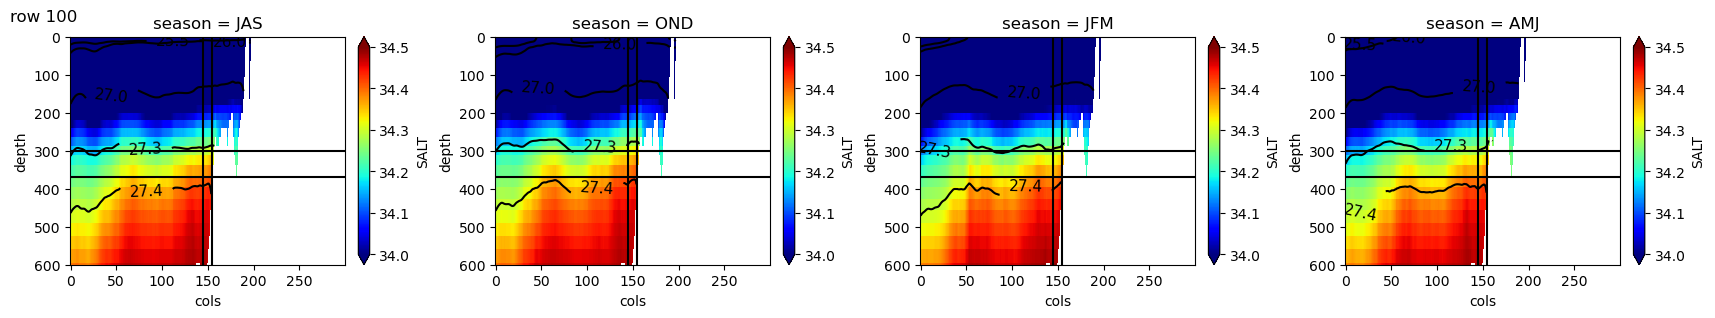

In [29]:
plt.rcParams['figure.figsize'] = [17, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
for i,ax in zip(season,[ax1,ax2,ax3,ax4]):
    salt_row100_season.SALT.sel(season=i).plot(ax=ax,cmap='jet',vmin=34,vmax=34.5)
    plt.clabel(density_row100_season.sel(season=i).plot.contour(ax=ax,colors='k',levels=density_levels), inline=True, fontsize=11)
    ax.set_ylim(600,0);
    
    ax.axhline(y=300,color='k')
    ax.axhline(y=370,color='k')
    ax.axvline(x=145,color='k')
    ax.axvline(x=155,color='k');
    
plt.suptitle("row 100",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);

### Row 100 WIDE

#### Theta

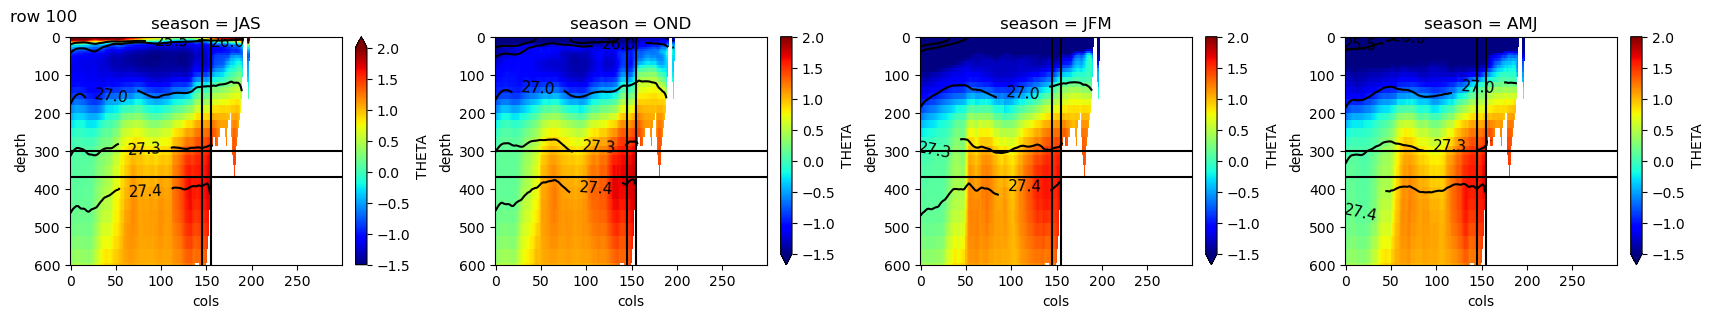

In [30]:
plt.rcParams['figure.figsize'] = [17, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
for i,ax in zip(season,[ax1,ax2,ax3,ax4]):
    theta_row100_season.THETA.sel(season=i).plot(ax=ax,cmap='jet',vmin=-1.5,vmax=2)
    plt.clabel(density_row100_season.sel(season=i).plot.contour(ax=ax,colors='k',levels=density_levels), inline=True, fontsize=11)
    ax.set_ylim(600,0);
    
    ax.axhline(y=300,color='k')
    ax.axhline(y=370,color='k')
    ax.axvline(x=125,color='k')
    ax.axvline(x=155,color='k');
    
plt.suptitle("row 100",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);

Re-plot but zoom in to box and adjust colorbar

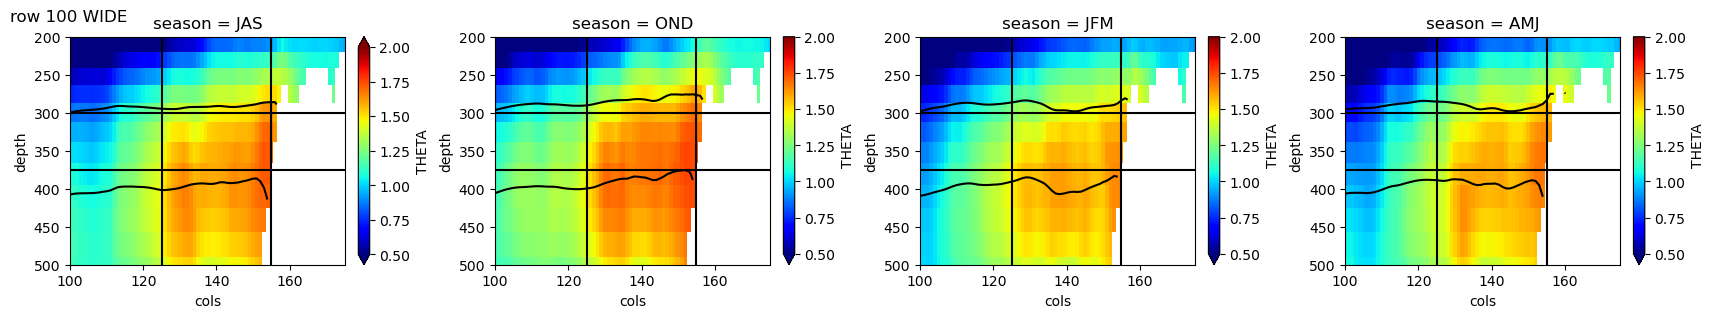

In [31]:
plt.rcParams['figure.figsize'] = [17, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
for i,ax in zip(season,[ax1,ax2,ax3,ax4]):
    theta_row100_season.THETA.sel(season=i).plot(ax=ax,cmap='jet',vmin=0.5,vmax=2)
    density_row100_season.sel(season=i).plot.contour(ax=ax,colors='k',levels=density_levels)
    ax.set_ylim(600,0);
    
    ax.axhline(y=300,color='k')
    ax.axhline(y=375,color='k')
    ax.axvline(x=125,color='k') # was 145
    ax.axvline(x=155,color='k');
    
    ax.set_xlim(100,175)
    ax.set_ylim(500,200)
    
plt.suptitle("row 100 WIDE",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);


Plot anomaly

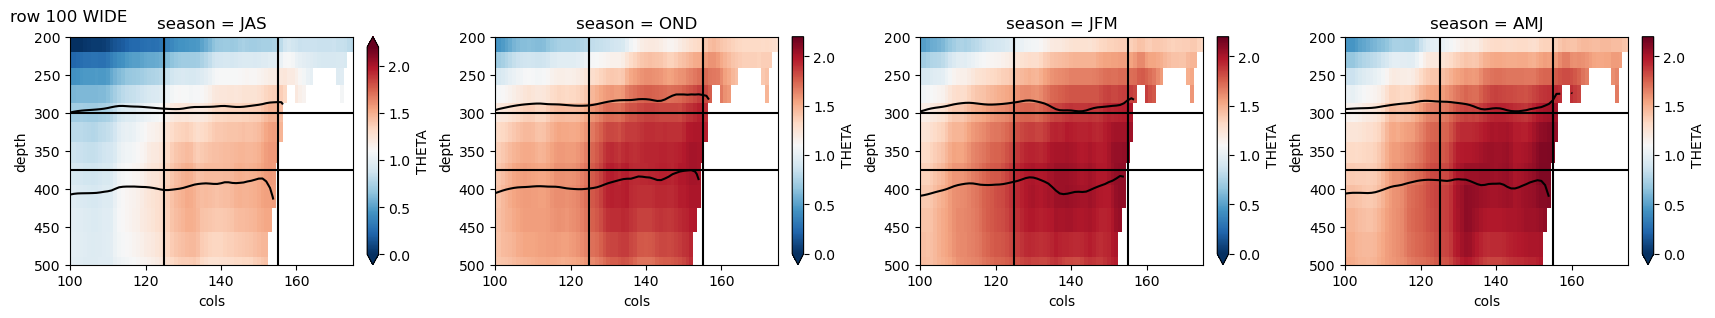

In [32]:
plt.rcParams['figure.figsize'] = [17, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
for i,ax in zip(season,[ax1,ax2,ax3,ax4]):
    (theta_row100_season.THETA.sel(season=i)-theta_row100_season.THETA.sel(season=i).mean()).plot(ax=ax,cmap='RdBu_r',vmin=0,vmax=2.2)
    density_row100_season.sel(season=i).plot.contour(ax=ax,colors='k',levels=density_levels)
    ax.set_ylim(600,0);
    
    ax.axhline(y=300,color='k')
    ax.axhline(y=375,color='k')
    ax.axvline(x=125,color='k')
    ax.axvline(x=155,color='k');
    
    ax.set_xlim(100,175)
    ax.set_ylim(500,200)
    
plt.suptitle("row 100 WIDE",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);

#### Salt

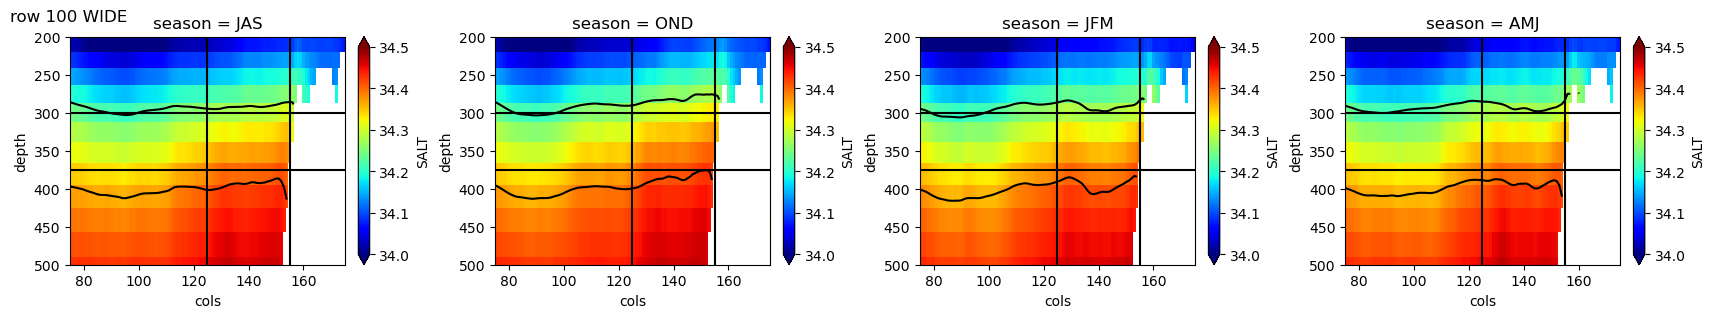

In [43]:
plt.rcParams['figure.figsize'] = [17, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
for i,ax in zip(season,[ax1,ax2,ax3,ax4]):
    salt_row100_season.SALT.sel(season=i).plot(ax=ax,cmap='jet',vmin=34,vmax=34.5)
    density_row100_season.sel(season=i).plot.contour(ax=ax,colors='k',levels=density_levels)
    ax.set_ylim(600,0);
    
    ax.axhline(y=300,color='k')
    ax.axhline(y=375,color='k')
    ax.axvline(x=125,color='k')
    ax.axvline(x=155,color='k');
    
    ax.set_xlim(75,175)
    ax.set_ylim(500,200)
    
plt.suptitle("row 100 WIDE",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);

### Row 125

#### Theta

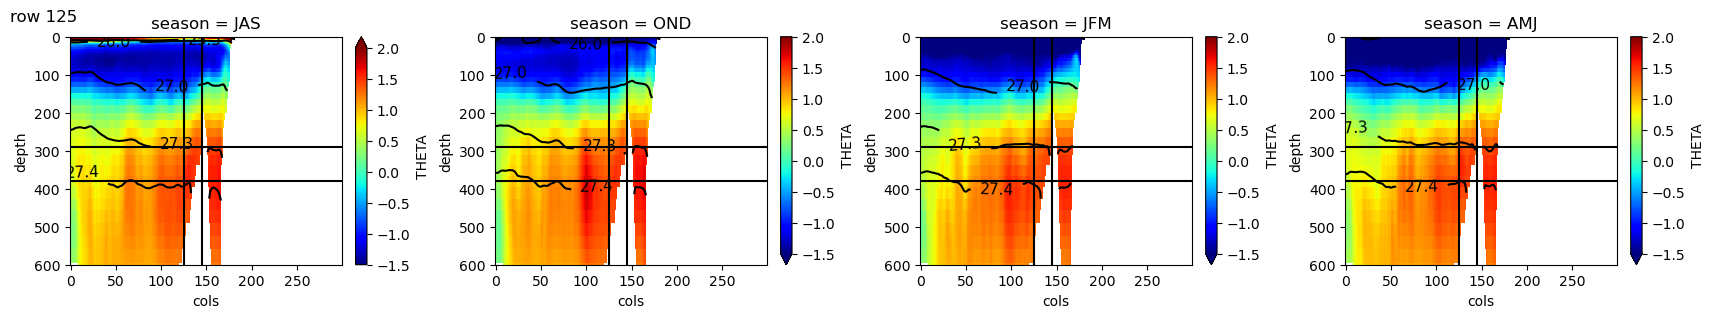

In [34]:
plt.rcParams['figure.figsize'] = [17, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
for i,ax in zip(season,[ax1,ax2,ax3,ax4]):
    theta_row125_season.THETA.sel(season=i).plot(ax=ax,cmap='jet',vmin=-1.5,vmax=2)
    plt.clabel(density_row125_season.sel(season=i).plot.contour(ax=ax,colors='k',levels=density_levels), inline=True, fontsize=11)
    ax.set_ylim(600,0);
    
    ax.axhline(y=290,color='k')
    ax.axhline(y=380,color='k')
    ax.axvline(x=125,color='k')
    ax.axvline(x=145,color='k');
    
plt.suptitle("row 125",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);

Re-plot but zoom in to box and adjust colorbar

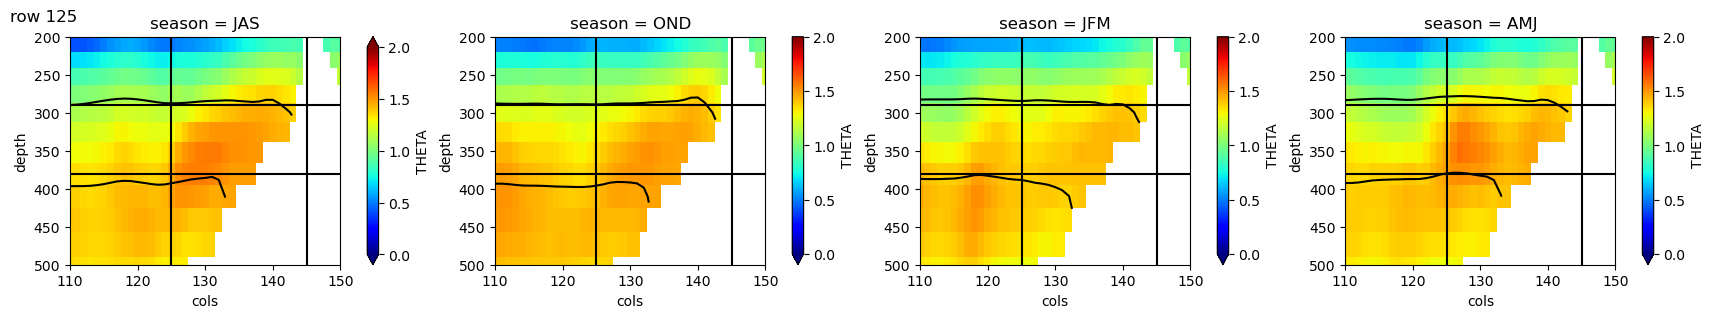

In [35]:
plt.rcParams['figure.figsize'] = [17, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
for i,ax in zip(season,[ax1,ax2,ax3,ax4]):
    theta_row125_season.THETA.sel(season=i).plot(ax=ax,cmap='jet',vmin=0,vmax=2)
    density_row125_season.sel(season=i).plot.contour(ax=ax,colors='k',levels=density_levels)
    ax.set_ylim(600,0);
    
    ax.axhline(y=290,color='k')
    ax.axhline(y=380,color='k')
    ax.axvline(x=125,color='k')
    ax.axvline(x=145,color='k');
    
    ax.set_xlim(110,150)
    ax.set_ylim(500,200)
    
plt.suptitle("row 125",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);

Plot anomaly

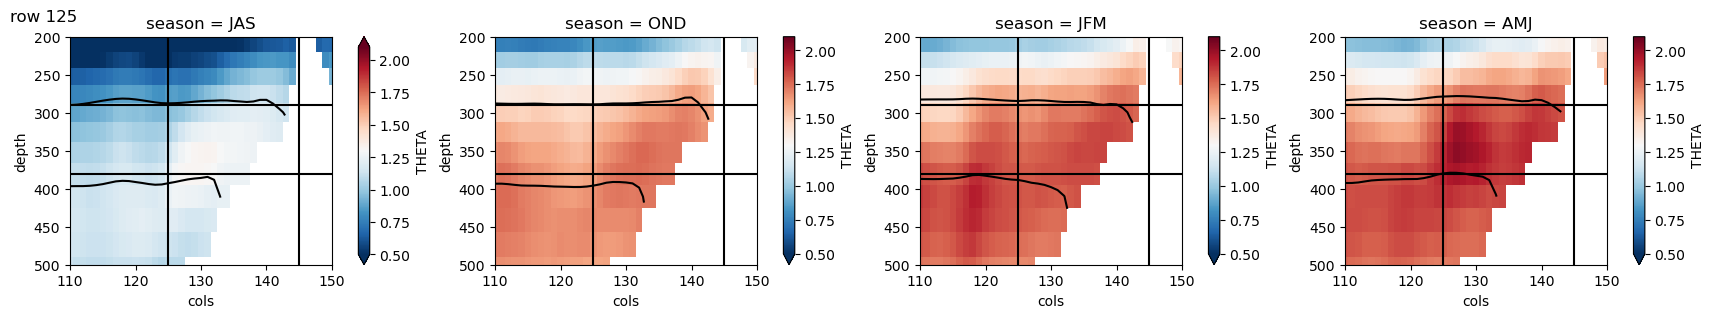

In [36]:
plt.rcParams['figure.figsize'] = [17, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
for i,ax in zip(season,[ax1,ax2,ax3,ax4]):
    (theta_row125_season.THETA.sel(season=i)-theta_row125_season.THETA.sel(season=i).mean()).plot(ax=ax,cmap='RdBu_r',vmin=0.5,vmax=2.1)
    density_row125_season.sel(season=i).plot.contour(ax=ax,colors='k',levels=density_levels)
    ax.set_ylim(600,0);
    
    ax.axhline(y=290,color='k')
    ax.axhline(y=380,color='k')
    ax.axvline(x=125,color='k')
    ax.axvline(x=145,color='k');
    
    ax.set_xlim(110,150)
    ax.set_ylim(500,200)
    
plt.suptitle("row 125",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);

#### Salt

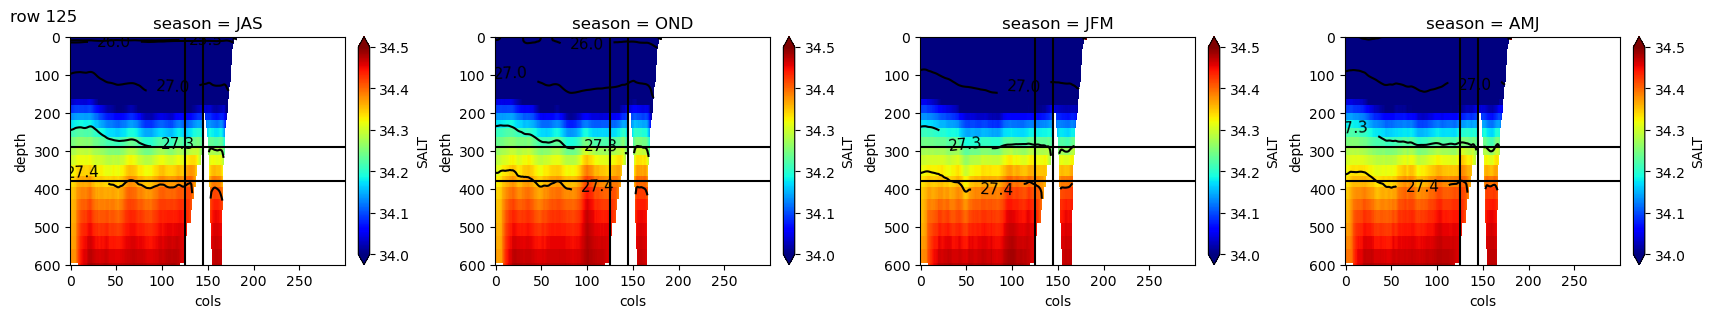

In [37]:
plt.rcParams['figure.figsize'] = [17, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
for i,ax in zip(season,[ax1,ax2,ax3,ax4]):
    salt_row125_season.SALT.sel(season=i).plot(ax=ax,cmap='jet',vmin=34,vmax=34.5)
    plt.clabel(density_row125_season.sel(season=i).plot.contour(ax=ax,colors='k',levels=density_levels), inline=True, fontsize=11)
    ax.set_ylim(600,0);
    
    ax.axhline(y=290,color='k')
    ax.axhline(y=380,color='k')
    ax.axvline(x=125,color='k')
    ax.axvline(x=145,color='k');
    
plt.suptitle("row 125",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);

### Row 150

#### Theta

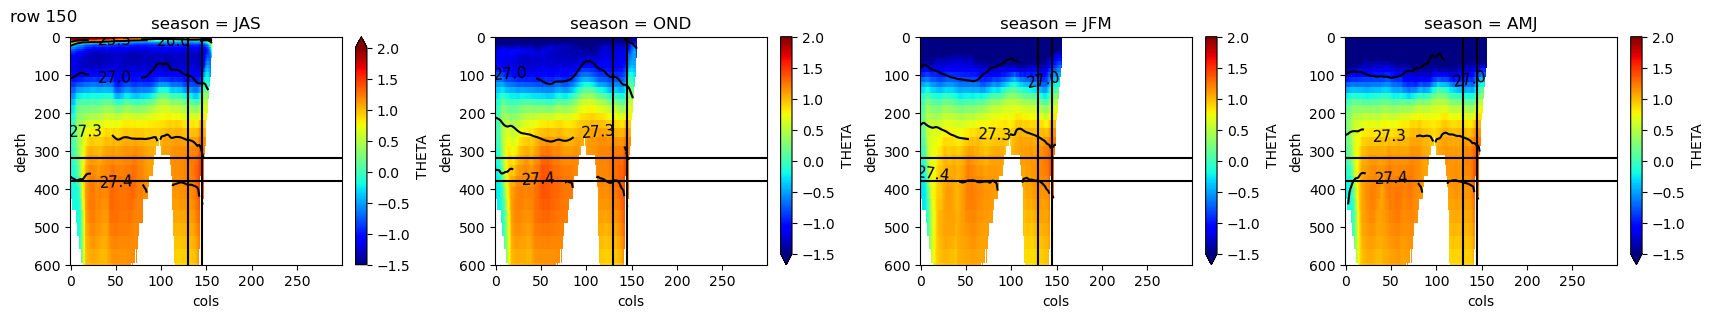

In [38]:
plt.rcParams['figure.figsize'] = [17, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
for i,ax in zip(season,[ax1,ax2,ax3,ax4]):
    theta_row150_season.THETA.sel(season=i).plot(ax=ax,cmap='jet',vmin=-1.5,vmax=2)
    plt.clabel(density_row150_season.sel(season=i).plot.contour(ax=ax,colors='k',levels=density_levels), inline=True, fontsize=11)
    ax.set_ylim(600,0);
    
    ax.axhline(y=320,color='k')
    ax.axhline(y=380,color='k')
    ax.axvline(x=130,color='k')
    ax.axvline(x=145,color='k');
    
plt.suptitle("row 150",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);

Re-plot but zoom in to box and adjust colorbar

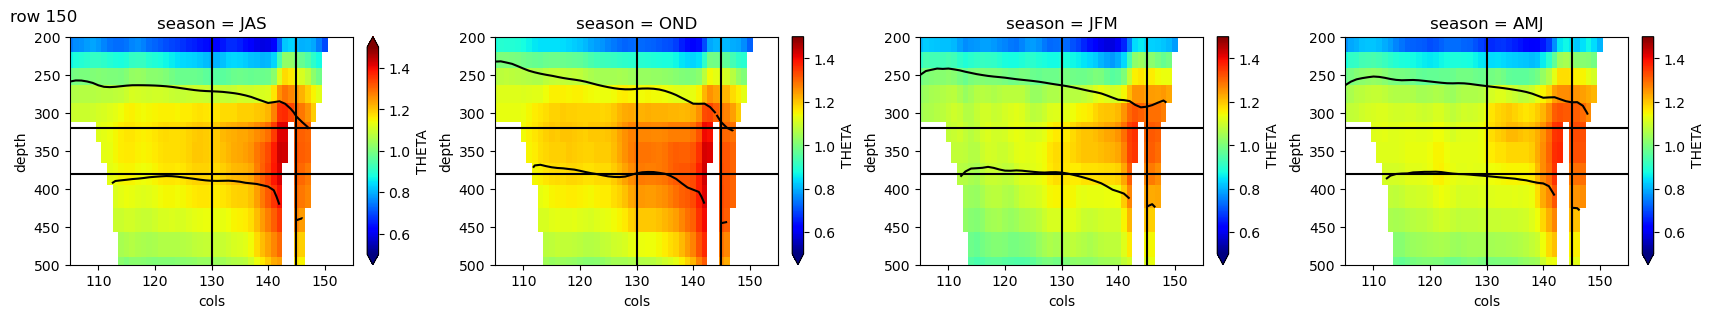

In [39]:
plt.rcParams['figure.figsize'] = [17, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
for i,ax in zip(season,[ax1,ax2,ax3,ax4]):
    theta_row150_season.THETA.sel(season=i).plot(ax=ax,cmap='jet',vmin=0.5,vmax=1.5)
    density_row150_season.sel(season=i).plot.contour(ax=ax,colors='k',levels=density_levels)
    ax.set_ylim(600,0);
    
    ax.axhline(y=320,color='k')
    ax.axhline(y=380,color='k')
    ax.axvline(x=130,color='k')
    ax.axvline(x=145,color='k');
    
    ax.set_xlim(105,155)
    ax.set_ylim(500,200)
    
plt.suptitle("row 150",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);

Plot anomaly

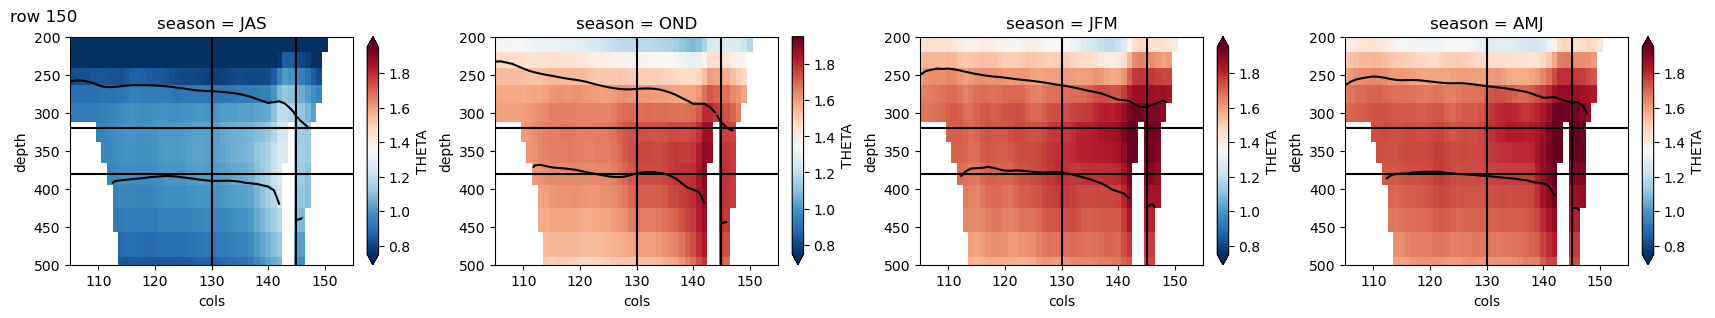

In [40]:
plt.rcParams['figure.figsize'] = [17, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
for i,ax in zip(season,[ax1,ax2,ax3,ax4]):
    (theta_row150_season.THETA.sel(season=i)-theta_row150_season.THETA.sel(season=i).mean()).plot(ax=ax,cmap='RdBu_r',vmin=0.75,vmax=1.95)
    density_row150_season.sel(season=i).plot.contour(ax=ax,colors='k',levels=density_levels)
    ax.set_ylim(600,0);
    
    ax.axhline(y=320,color='k')
    ax.axhline(y=380,color='k')
    ax.axvline(x=130,color='k')
    ax.axvline(x=145,color='k');
    
    ax.set_xlim(105,155)
    ax.set_ylim(500,200)
    
plt.suptitle("row 150",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);

#### Salt

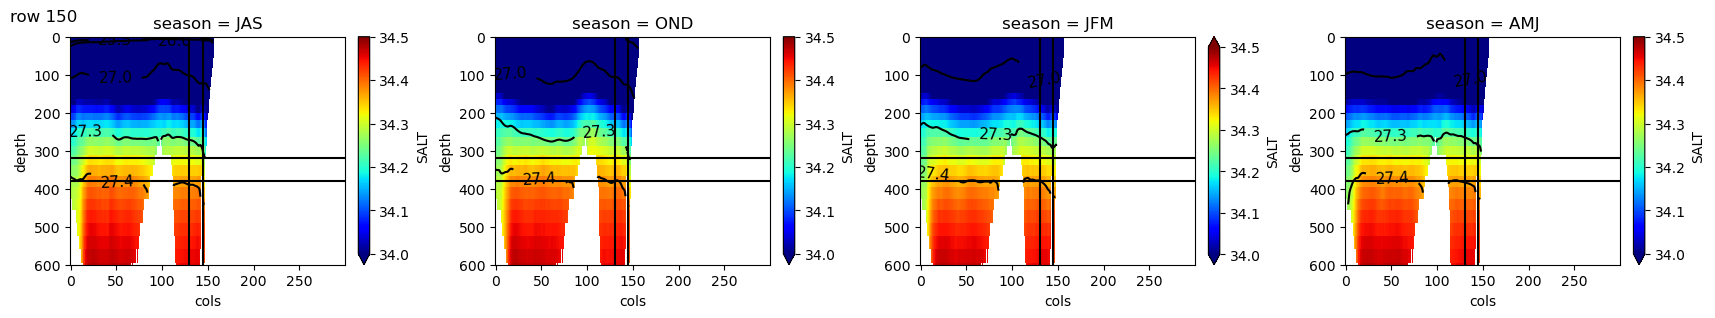

In [41]:
plt.rcParams['figure.figsize'] = [17, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
for i,ax in zip(season,[ax1,ax2,ax3,ax4]):
    salt_row150_season.SALT.sel(season=i).plot(ax=ax,cmap='jet',vmin=34,vmax=34.5)
    plt.clabel(density_row150_season.sel(season=i).plot.contour(ax=ax,colors='k',levels=density_levels), inline=True, fontsize=11)
    ax.set_ylim(600,0);
    
    ax.axhline(y=320,color='k')
    ax.axhline(y=380,color='k')
    ax.axvline(x=130,color='k')
    ax.axvline(x=145,color='k');
    
plt.suptitle("row 150",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);

Replot and zoom in

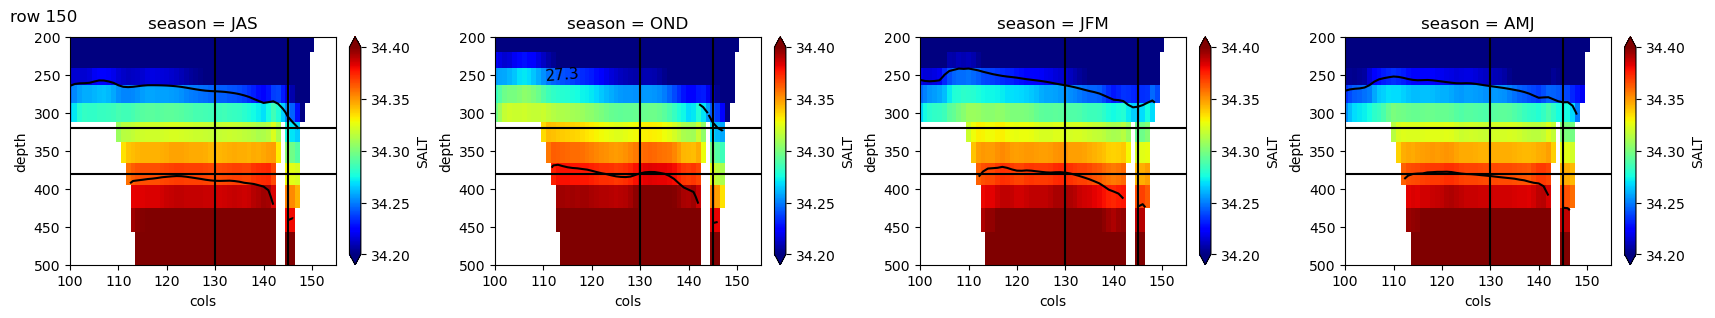

In [42]:
plt.rcParams['figure.figsize'] = [17, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
for i,ax in zip(season,[ax1,ax2,ax3,ax4]):
    salt_row150_season.SALT.sel(season=i).plot(ax=ax,cmap='jet',vmin=34.2,vmax=34.4)
    plt.clabel(density_row150_season.sel(season=i).plot.contour(ax=ax,colors='k',levels=density_levels), inline=True, fontsize=11)
    ax.set_ylim(600,0);
    
    ax.axhline(y=320,color='k')
    ax.axhline(y=380,color='k')
    ax.axvline(x=130,color='k')
    ax.axvline(x=145,color='k');
    
    ax.set_xlim(100,155)
    ax.set_ylim(500,200)
    
plt.suptitle("row 150",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);